# Text Classification using Naive Bayes

## Datasets
`Reuters-21578` datasets 사용

Reuters-21578 데이터는 22개 파일에 분산 돼 있고, `reut2-000.sgm`에서 `reut-021.sgm` 까지는 각각 1,000개의 doc을 갖고 있고, 마지막 `reut-022.sgm`은 578개의 doc을 갖고 있다.

`REUTER` tag 안에 있는 tag들

1. DATE
2. MKNOTE
3. TOPICS
4. PLACES
5. PEOPLE
6. ORGS
7. EXCHANGES
8. COMPANIES
9. UNKNOWN
10. TEXT


In [151]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import bs4
from collections import defaultdict, Counter
from functools import reduce
import nltk

In [26]:
base_dir = "reuters21578/"
all_exchanges = [_.strip() for _ in open(base_dir + "all-exchanges-strings.lc.txt", newline='\n').readlines()]
all_orgs = [_.strip() for _ in open(base_dir + "all-orgs-strings.lc.txt", newline="\n").readlines()]
all_people = [_.strip() for _ in open(base_dir + "all-people-strings.lc.txt", newline="\n").readlines()]
all_places = [_.strip() for _ in open(base_dir + "all-places-strings.lc.txt", newline="\n").readlines()]
all_topics = [_.strip() for _ in open(base_dir + "all-topics-strings.lc.txt", newline="\n").readlines()]

# print(all_exchanges)
# print("==")
# print(all_orgs)
# print("==")
# print(all_people)
# print("==")
# print(all_places)
# print("==")
# print(all_topics)

## Data Preprocessing
각각의 sgm 파일에서 documents들을 가져와, topic 별로 분류를 한다.

In [52]:
reuters = []

for i in range(22):
    file_name = base_dir + "reut2-{}.sgm".format(str(i).zfill(3))
    with open(file_name, "rt") as f:
        soup = bs4.BeautifulSoup(f.read(), "html5lib")
        reuters += soup.select("reuters")
print(len(reuters))

21578


In [112]:
topics = defaultdict(list)
for i, _ in enumerate(reuters):
    t_l = _.select("topics > d")
    
    if t_l:
        for t in t_l:
            topics[t.get_text()].append(i)

c:\users\yumere\appdata\local\programs\python\python35\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


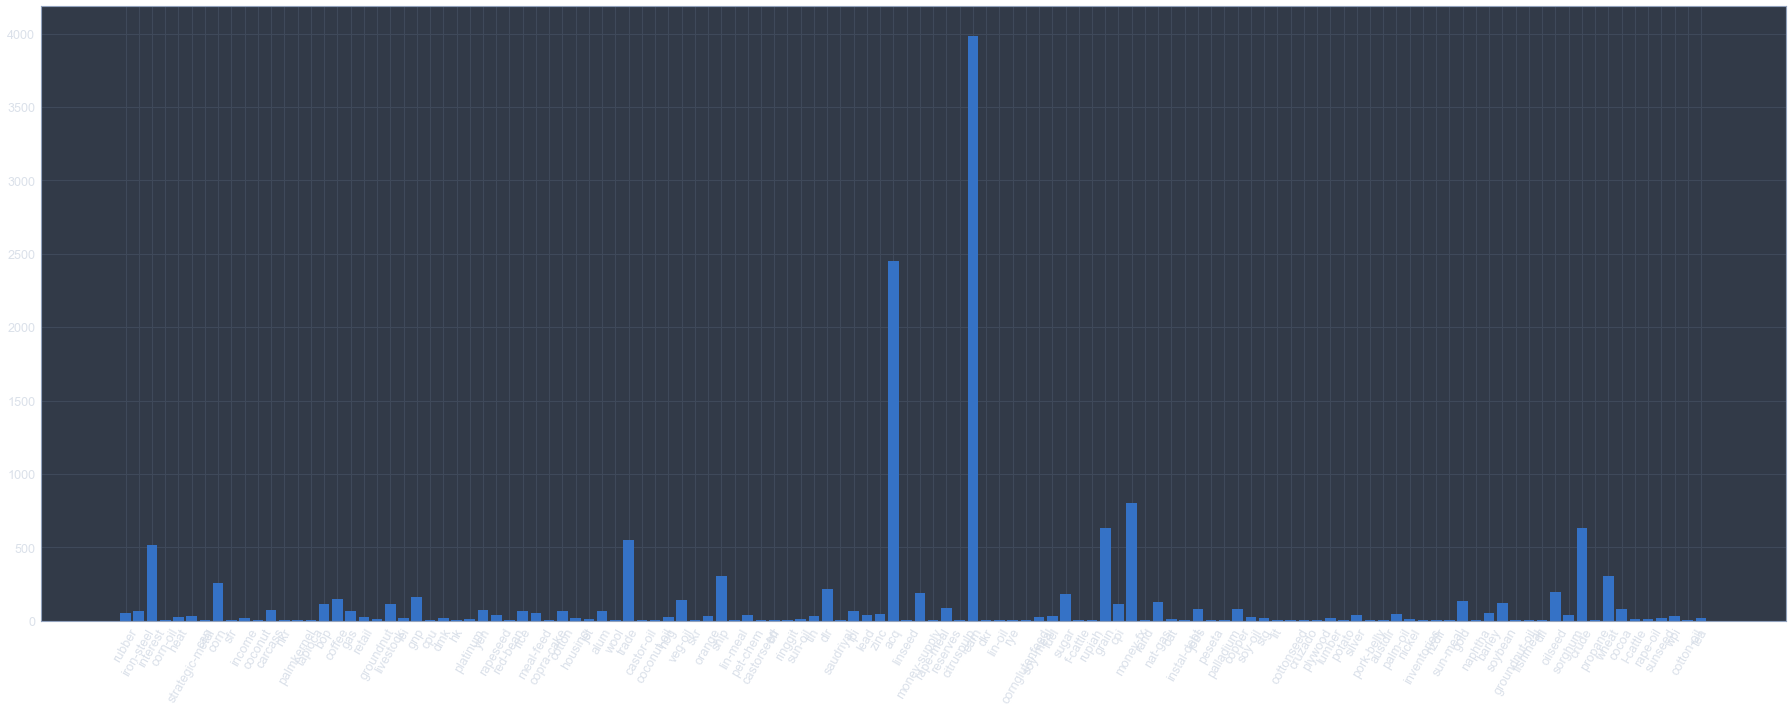

In [113]:
# Class 분류 안되는게 너무 많다. 10000개 이상
_x = [_ for _ in topics.keys() if _]
_y = [len(topics[_]) for _ in _x]

plt.figure(figsize=(25, 10))
plt.bar(list(range(len(_x))), _y, tick_label=_x)
plt.xticks(rotation=60)
plt.show()

## Calculate probability values according to Bayesian rule
`argmax(P(c_j | d))` 값을 구한다.

P(c | d) = { P(d | c) \* P(c) } / P(d)

P(d | c) = p(w_1 | c) \* P(w_2 | c) \* P(w_3 | c) \* ... \* P(w_i | c)

P(c_j) = count(d < c_j) / |D|
P(w_i | c_j) = count(w_i, c_j) / sum(count(w, c_j))

In [143]:
prob_c = defaultdict(float)
total_docs = 0
for t in topics.values():
    total_docs += len(t)

for k, v in topics.items():
    prob_c[k] = len(v) / total_docs

In [162]:
wc = defaultdict(Counter)
is_noun = lambda pos: pos[:2] == "NN"

for t in topics:
    for d_index in topics[t]:
        d = reuters[d_index].select_one("text")
        words = [word for word, pos in nltk.pos_tag(nltk.word_tokenize(d.get_text())) if is_noun(pos)]
        wc[t].update(words)    

In [178]:
prob_wc = defaultdict(int)
for t in topics:
    c = 0
    for w, v in wc[t].items():
        c += v
    prob_wc[t] = c
print(prob_wc)

defaultdict(<class 'int'>, {0: 0, 'rubber': 4531, 'iron-steel': 5035, 'interest': 34943, 'corn-oil': 46, 'heat': 1995, 'lei': 826, 'can': 462, 'corn': 20471, 'income': 1524, 'coconut': 526, 'carcass': 7084, 'nkr': 107, 'palmkernel': 316, 'earn': 167227, 'bop': 10181, 'coffee': 13528, 'gas': 5384, 'retail': 2679, 'groundnut': 786, 'livestock': 9006, 'strategic-metal': 2219, 'gnp': 17677, 'cpu': 184, 'dmk': 1281, 'hk': 68, 'platinum': 752, 'yen': 5711, 'rapeseed': 1705, 'red-bean': 73, 'gold': 9434, 'meal-feed': 5013, 'copra-cake': 441, 'cotton': 5984, 'fuel': 2234, 'jet': 613, 'rand': 335, 'wool': 114, 'trade': 54153, 'coconut-oil': 1057, 'rye': 163, 'hog': 1513, 'veg-oil': 11878, 'skr': 27, 'orange': 2065, 'ship': 22214, 'lin-meal': 51, 'pet-chem': 3223, 'soy-oil': 3025, 'sfr': 354, 'bfr': 63, 'copper': 5543, 'ringgit': 67, 'sun-oil': 502, 'tin': 3487, 'dlr': 16183, 'saudriyal': 420, 'sugar': 14555, 'lead': 2777, 'zinc': 3210, 'acq': 147335, 'linseed': 148, 'money-supply': 11044, 'rape

In [163]:
wc

defaultdict(collections.Counter,
            {'acq': Counter({'Bolt': 2,
                      'Trecker': 2,
                      'Northeast': 11,
                      'publication': 3,
                      'NET': 3,
                      'pre-tax': 1,
                      'PEG-uricase': 1,
                      'Campbell': 3,
                      'H.W': 1,
                      'INMA': 2,
                      'English-language': 1,
                      'NORRIS': 1,
                      'installs': 2,
                      'ACT': 4,
                      'Smaller': 1,
                      'BENCH': 1,
                      'Bramalea': 3,
                      'AA': 1,
                      'MHP': 2,
                      'Garment': 2,
                      'IC': 26,
                      'Tractor': 1,
                      'world': 38,
                      'developments': 6,
                      'UtilCo': 1,
                      'APPROPRIATE': 1,
                      'Shult

In [202]:
index = 9380
print(reuters[index].select_one("topics").get_text())
d = reuters[index].select_one("text").get_text()
words = Counter()
words.update([word for word, pos in nltk.pos_tag(nltk.word_tokenize(d)) if is_noun(pos)])

acq


In [203]:
result = []
for t in topics:
    p_c = prob_c[t]
    p_wc = 1
    for w, c in words.items():
        p_wc *= (c / (prob_c[t] + 1))
        
    result.append((t, p_c * p_wc))
result.sort(key=lambda x: x[1], reverse=True)
result

[('wheat', 0.9188072203038238),
 ('ship', 0.9181900609245196),
 ('interest', 0.9024149971952979),
 ('trade', 0.8787007434004676),
 ('corn', 0.8733489330157017),
 ('grain', 0.8234529890001444),
 ('dlr', 0.821895863358509),
 ('crude', 0.818724016584525),
 ('oilseed', 0.7764246652695538),
 ('money-supply', 0.7723765811838984),
 ('sugar', 0.7598491994890693),
 ('gnp', 0.7112770911293204),
 ('money-fx', 0.6779254299085758),
 ('coffee', 0.6633890465270017),
 ('veg-oil', 0.64012089559419),
 ('gold', 0.6341051531982458),
 ('nat-gas', 0.6187104408893238),
 ('soybean', 0.5863601396733316),
 ('bop', 0.5728211491783471),
 ('livestock', 0.5659203529459637),
 ('cpi', 0.5589310150997646),
 ('reserves', 0.45134539888044045),
 ('copper', 0.42580307460107825),
 ('jobs', 0.4170837214790099),
 ('cocoa', 0.4170837214790099),
 ('carcass', 0.4126850719526441),
 ('yen', 0.3857406022767104),
 ('iron-steel', 0.3765459329401894),
 ('rice', 0.3765459329401894),
 ('gas', 0.3672431719285265),
 ('ipi', 0.36724317192